## Создание запроса с использованием Overpass API 

Для того, чтобы не выгружать большое количество данных OpenStreetMap, можно создать запрос для извлечения данных по узлам или путям, а также установления связи между объектами. Для этого используется специализированный язык запросов.

In [ ]:
import requests
import json


Данные можно сохранить в различных форматах, json - наиболее приемлемый, так как все ГИС системы поддерживают специализированный формат GeoJSON.

In [ ]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name = "Санкт-Петербург"];( node["amenity"="bench"](area);
);
out center;

"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()


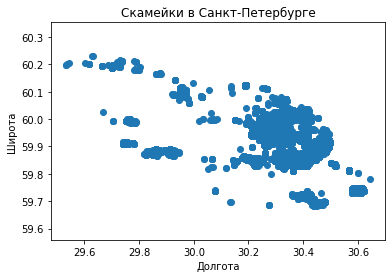

In [7]:
import numpy as np
import matplotlib.pyplot as plt# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Скамейки в Санкт-Петербурге')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.axis('equal')
plt.show()